In [36]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import smartload.smartload as smart
from src import utils
import scipy.io
import os

%matplotlib inline

%reload_ext autoreload
%autoreload 2


In [48]:
paths = utils.pathsetup('matchingsim')
version = '121921'
nstates = 5
files = glob.glob(f"/{paths['blockhmmfitpath']}/{version}/*hmmblockfit_*{version}.mat")
print(f"Number of files = {len(files)}\nNumber of states = {nstates}")

Number of files = 17
Number of states = 5


In [44]:
params_all = []
params = np.zeros((nstates, 3)) * np.nan

for file in files:
    data = smart.loadmat(file)

    zstates = data['zstates']
    assert(len(np.unique(zstates)) == nstates)
    assert(max(np.unique(zstates)) == nstates - 1)
    
    
    obs = data['obs']
    
    offsets = []
    slopes = []
    lapses = []

    # Subsample
    for i in range(nstates):
        obs_singlez = obs[zstates == i]
        mean_singlez = np.mean(obs_singlez, axis=0)
        offset, slope, _, _, lapse, _ = utils.fit_doublesigmoid_helper(mean_singlez, 1 - mean_singlez)
        offsets.append(offset)
        slopes.append(slope)
        lapses.append(lapse)

    params[:,0] = offsets
    params[:,1] = slopes
    params[:,2] = lapses
    
    params_all.append(params)
        


In [46]:
# Save the sigmoidal fits
savefilename = f"{paths['blockhmmfitpath']}/{version}/sigmoid_fit_all_{version}.mat"
if not os.path.exists(savefilename):
    scipy.io.savemat(f"{paths['blockhmmfitpath']}/{version}/sigmoid_fit_all_{version}.mat", dict(files=files, params_all=params_all))
else:
    raise IOError('File exists, skipping save..')

OSError: File exists, skipping save..

In [10]:
params_all = []
for file in files:
    data = smart.loadmat(file)

    zstates = data['zstates']
    obs = data['obs']

    # Subsample
#     offsets1 = []
#     slopes1 = []
#     lapses1 = []

#     offsets2 = []
#     slopes2 = []
#     lapses2 = []

    for i in range(4):
        obs_singlez = obs[zstates == i]
        mean_singlez = np.mean(obs_singlez, axis=0)

#         mean_singlez1 = np.mean(obs_singlez[:int(N/2),:], axis=0)
#         mean_singlez2 = np.mean(obs_singlez[int(N/2):,:], axis=0)

        print(mean_singlez)
#         offset1, slope1, _, _, lapse1, _ = utils.fit_doublesigmoid_helper(mean_singlez1, 1 - mean_singlez1)
#         offset2, slope2, _, _, lapse2, _ = utils.fit_doublesigmoid_helper(mean_singlez2, 1 - mean_singlez2)

        offset, slope, _, _, lapse, _ = utils.fit_doublesigmoid_helper(mean_singlez, 1 - mean_singlez)
#         offsets1.append(offset1)
#         offsets2.append(offset2)
#         slopes1.append(slope1)
#         slopes2.append(slope2)

#         lapses1.append(lapse1)
#         lapses2.append(lapse2)

    params[:,0] = offsets1
    params[:,1] = slopes1
    params[:,2] = lapses1
    params[:,3] = offsets2
    params[:,4] = slopes2
    params[:,5] = lapses2
    
    print(params)
    
    params_all.append(params)
        
    
    



NameError: name 'N' is not defined

In [53]:
scipy.io.savemat(paths['expdatapath'] + '/113021/sigmoid_fit_all_113021b.mat', dict(files=files, params_all=params_all))

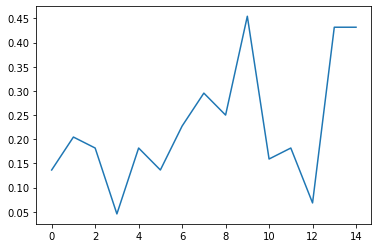

In [33]:
plt.plot(mean_singlez1)




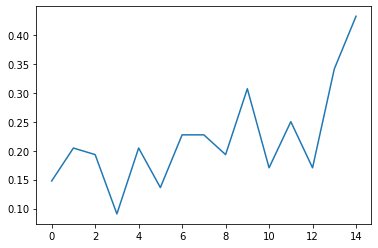

In [36]:
plt.plot(np.mean(obs_singlez, axis=0))


In [50]:
pR

array([-0.32023688,  0.        ,  0.05278729])

In [29]:
obs_singlez.shape



(44, 15)

In [ ]:
utils.

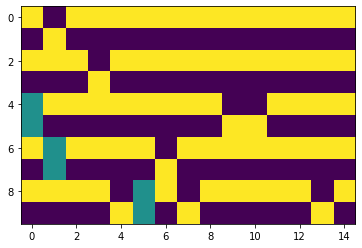

In [42]:
plt.imshow(obs_double[:10,:], aspect='auto')

In [46]:
params = np.zeros((4, 6)) * np.nan
    
# print(file)
data = smart.loadmat(files[2])

zstates = data['zstates']
obs = data['obs']

# Subsample
offsets1 = []
slopes1 = []
lapses1 = []

offsets2 = []
slopes2 = []
lapses2 = []

for i in range(4):
    obs_singlez = obs[zstates == i]
    mean_singlez = np.mean(obs_singlez, axis=0)
    
    mean_singlez1 = np.mean(obs_singlez[:int(N/2),:], axis=0)
    mean_singlez2 = np.mean(obs_singlez[int(N/2):,:], axis=0)

    print(mean_singlez1)
    offset1, slope1, _, _, lapse1, _ = utils.fit_doublesigmoid_helper(mean_singlez1, 1 - mean_singlez1)
    offset2, slope2, _, _, lapse2, _ = utils.fit_doublesigmoid_helper(mean_singlez2, 1 - mean_singlez2)
    
#     offset, slope, _, _, lapse, _ = utils.fit_doublesigmoid_helper(mean_singlez, 1 - mean_singlez)
    offsets1.append(offset1)
    offsets2.append(offset2)
    slopes1.append(slope1)
    slopes2.append(slope2)
    
    lapses1.append(lapse1)
    lapses2.append(lapse2)

params[:,0] = offsets1
params[:,1] = slopes1
params[:,2] = lapses1
params[:,3] = offsets2
params[:,4] = slopes2
params[:,5] = lapses2

print(params)

params_all.append(params)

[0.27272727 0.22727273 0.34090909 0.09090909 0.13636364 0.5
 0.61363636 0.68181818 0.63636364 0.86363636 0.90909091 0.86363636
 0.90909091 0.90909091 0.81818182]
[0.13636364 0.22727273 0.18181818 0.40909091 0.09090909 0.36363636
 0.13636364 0.27272727 0.22727273 0.22727273 0.22727273 0.22727273
 0.45454545 0.29545455 0.27272727]
[0.68181818 0.68181818 0.86363636 0.86363636 0.90909091 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
[0.27272727 0.63636364 0.36363636 0.54545455 0.54545455 0.45454545
 0.70454545 0.61363636 0.5        0.47727273 0.63636364 0.54545455
 0.45454545 0.61363636 0.59090909]
[[-5.62707674e+00  8.72454128e-01  1.53371558e-01 -5.75163391e+00
   3.05406958e-01  0.00000000e+00]
 [-3.03443739e+01  5.95309597e-02  8.55267580e-02 -3.44945819e+01
   4.11063552e-02  9.42096466e-03]
 [ 0.00000000e+00  7.20020110e-01  0.00000000e+00  0.00000000e+00
   9.79077732e-01  5.35590578e-02]
 [-2.90574854e+00  6.20840189e-01  4.2619522

In [51]:
params

array([[-5.62707674e+00,  8.72454128e-01,  1.53371558e-01,
        -5.75163391e+00,  3.05406958e-01,  0.00000000e+00],
       [-3.03443739e+01,  5.95309597e-02,  8.55267580e-02,
        -3.44945819e+01,  4.11063552e-02,  9.42096466e-03],
       [ 0.00000000e+00,  7.20020110e-01,  0.00000000e+00,
         0.00000000e+00,  9.79077732e-01,  5.35590578e-02],
       [-2.90574854e+00,  6.20840189e-01,  4.26195224e-01,
        -1.55753561e+00,  4.08745409e-01,  4.49018237e-01]])

In [16]:
obs_singlez = obs[zstates == 2]
mean_singlez = np.mean(obs_singlez, axis=0)
offset, slope, _, _, lapse, _ = utils.fit_doublesigmoid_helper(mean_singlez, 1 - mean_singlez)
# offsets.append(offset)
# slopes.append(slope)
# lapses.append(lapse)

In [21]:
utils.fit_doublesigmoid_helper(mean_singlez, 1-mean_singlez)

array([-13.85839917,   0.        , -13.85839917,   0.        ,
         0.5       ,   0.5       ])

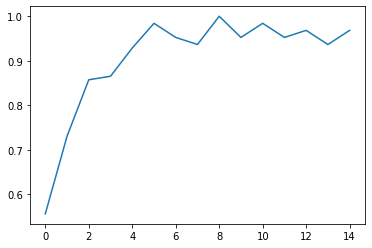

In [18]:
plt.plot(mean_singlez)

In [22]:
mean_singlez

[autoreload of src.utils failed: Traceback (most recent call last):
  File "/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/minhnhatle/opt/anaconda3/envs/default/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 851, in exec_module
  File "<frozen importlib._bootstrap_external>", line 988, in get_code
  File "<frozen importlib._bootstrap_external>", line 918, in source_to_code
  File "<frozen importli

array([0.55555556, 0.73015873, 0.85714286, 0.86507937, 0.92857143,
       0.98412698, 0.95238095, 0.93650794, 1.        , 0.95238095,
       0.98412698, 0.95238095, 0.96825397, 0.93650794, 0.96825397])